# ノードと類似度指数の次数を計算する

## セットアップ

In [2]:
# Move up to top directory
import os
from pathlib import Path

print(os.getcwd())

while not Path("LICENSE").exists():
    os.chdir('../')

print(os.getcwd())

/mnt/e/Research/TSUMUGI-dev-main/notebooks/notebooks-experiments
/mnt/e/Research/TSUMUGI-dev-main


In [3]:
from pathlib import Path
from pprint import pprint
from collections import defaultdict, Counter
from itertools import combinations
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import networkx as nx

P = print
PP = pprint
C = Counter


# 実験

In [4]:
df_similarity = pd.read_csv('data/TSUMUGI_raw_data.csv.gz')
# 15 sec

In [5]:
conditions = (
    (df_similarity['Number of overlapped phenotype'] > 0) &
    (df_similarity['Jaccard Similarity'] > 0.1)
)
df_similarity_with_phenotype = df_similarity[conditions]
df_similarity_with_phenotype # 1779355 row

,Gene1,Gene2,Jaccard Similarity,Number of overlapped phenotype,Overlapped phenotype
5,0610010K14Rik,1700003F12Rik,0.167,1,"['preweaning lethality, complete penetrance (H..."
18,0610010K14Rik,1700067K01Rik,0.250,1,"['preweaning lethality, complete penetrance (H..."
26,0610010K14Rik,2310011J03Rik,0.200,1,"['preweaning lethality, complete penetrance (H..."
42,0610010K14Rik,4930444P10Rik,0.125,1,"['preweaning lethality, complete penetrance (H..."
56,0610010K14Rik,4933427D14Rik,0.500,3,['embryonic lethality prior to organogenesis (...
...,...,...,...,...,...
29996154,Znhit2,Znhit6,0.154,2,['embryonic lethality prior to organogenesis (...
29996158,Znhit2,Zranb2,0.125,1,"['preweaning lethality, complete penetrance (H..."
29996170,Znhit2,Zwint,0.250,2,['embryonic lethality prior to organogenesis (...
29996190,Znhit6,Zwint,0.182,2,['embryonic lethality prior to organogenesis (...


In [6]:
# 次数をプロット

df = df_similarity_with_phenotype

# 無向グラフを作成
G = nx.Graph()
G.add_edges_from(zip(df["Gene1"], df["Gene2"]))

# 各ノードの次数を取得
degree_dict = dict(G.degree())

# DataFrameに変換
degree_df = pd.DataFrame(list(degree_dict.items()), columns=["Gene", "Degree"]).sort_values(by="Degree", ascending=False)

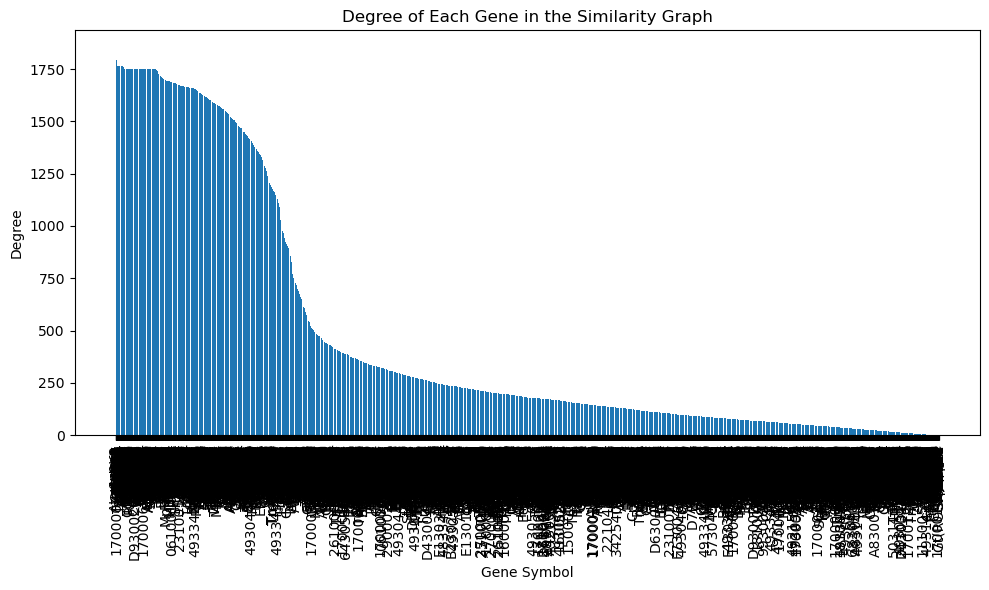

In [7]:
# プロット
plt.figure(figsize=(10, 6))
plt.bar(degree_df["Gene"], degree_df["Degree"])
plt.xticks(rotation=90)
plt.xlabel("Gene Symbol")
plt.ylabel("Degree")
plt.title("Degree of Each Gene in the Similarity Graph")
plt.tight_layout()
plt.show()

<Axes: >

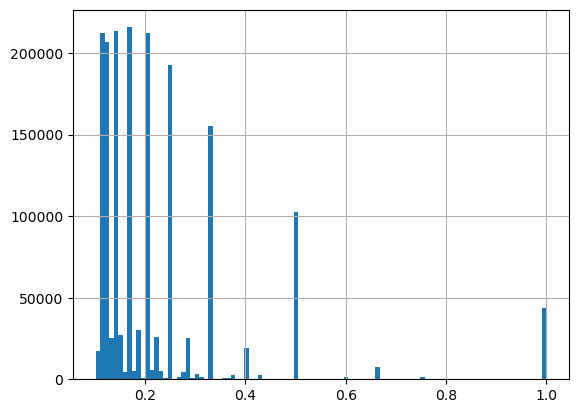

In [10]:
df_similarity_with_phenotype["Jaccard Similarity"].hist(bins=100)